In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_image(image_path):
    if not os.path.exists(image_path):
        raise Exception("Image not found")

    im_bgr = None
    im_gray = None

    img = cv2.imread(image_path)

    if img.ndim == 3:
        im_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
        im_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    else:
        im_bgr = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        im_gray = im_bgr
    
    return im_bgr, im_gray

In [3]:
image_path = "./pdfimg/page_17.png"
# image_path = "./0.png"

im_bgr, im_gray = read_image(image_path)

print("Image from: ", image_path)
print(f"Resolution: {im_bgr.shape[1]}x{im_bgr.shape[0]}")

Image from:  ./pdfimg/page_9.png
Resolution: 2180x2907


In [4]:
def AutomaticThresholdBW(src):
    """code from: https://github.com/p-siriphanthong/simple-thai-ocr/tree/master

    Args:
        src (_type_): _description_

    Returns:
        _type_: Treshold value
    """
    T = np.mean(src)
    while True:
        R1 = src[np.where(src <= T)]
        R2 = src[np.where(src > T)]
        new_T = (np.mean(R1) + np.mean(R2)) / 2
        if T == new_T:
            return T
        T = new_T
        
def Cvt2BW(im_gray):
    tresh = AutomaticThresholdBW(im_gray)
    im_bw = np.copy(im_gray)
    im_bw[im_gray > tresh] = 255
    im_bw[im_gray <= tresh] = 0
    return im_bw

In [5]:
im_bw = Cvt2BW(im_gray)

# plt.figure(figsize=(10, 20))
# plt.imshow(im_bw, cmap='gray')
# plt.xticks([]), plt.yticks([])
# plt.show()

In [6]:
# find long horizontal lines

hprojection = np.sum(im_bw == 0, axis=1)
vprojection = np.sum(im_bw == 0, axis=0)

rows, cols = [], []

prev = 0
for i in range(im_bw.shape[0]):
    hprojection[i] = len(np.where(im_bw[i] == 0)[0])
    if hprojection[i] != 0 and prev == 0:
        rows.append({'start': i})
    elif hprojection[i] == 0 and prev != 0:
        rows[-1]['stop'] = i if i < im_bw.shape[0] - 1 else im_bw.shape[0] - 1
    prev = hprojection[i]

prev = 0
for i in range(im_bw.shape[1]):
    vprojection[i] = len(np.where(im_bw[:, i] == 0)[0])
    if vprojection[i] != 0 and prev == 0:
        cols.append({'start': i})
    elif vprojection[i] == 0 and prev != 0:
        cols[-1]['stop'] = i if i < im_bw.shape[1] - 1 else im_bw.shape[1] - 1
    prev = vprojection[i]

if prev != 0 and 'stop' not in cols[-1]:
    cols[-1]['stop'] = len(vprojection) - 1


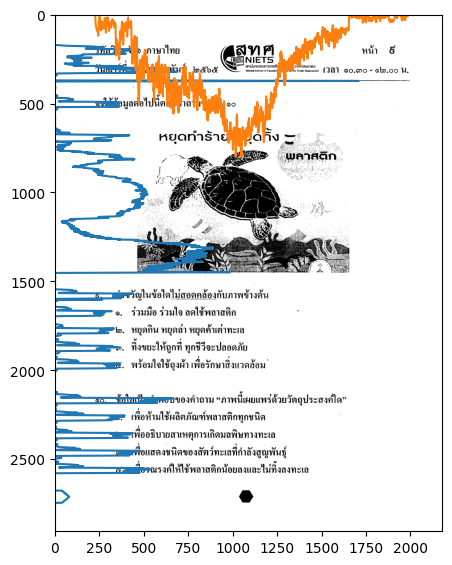

In [7]:




# visualize histogram                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
plt.figure(figsize=(5, 7))
plt.plot(hprojection, np.arange(im_bw.shape[0]))
plt.plot(np.arange(im_bw.shape[1]), vprojection)
plt.imshow(im_bw, cmap='gray')
plt.show()

In [8]:
print("Rows: ", rows)
print("Cols: ", cols)

Rows:  [{'start': 16, 'stop': 18}, {'start': 40, 'stop': 43}, {'start': 171, 'stop': 344}, {'start': 371, 'stop': 377}, {'start': 378, 'stop': 380}, {'start': 384, 'stop': 385}, {'start': 408, 'stop': 413}, {'start': 439, 'stop': 440}, {'start': 453, 'stop': 466}, {'start': 468, 'stop': 521}, {'start': 522, 'stop': 535}, {'start': 583, 'stop': 584}, {'start': 592, 'stop': 593}, {'start': 613, 'stop': 614}, {'start': 631, 'stop': 633}, {'start': 640, 'stop': 1457}, {'start': 1458, 'stop': 1459}, {'start': 1477, 'stop': 1480}, {'start': 1501, 'stop': 1502}, {'start': 1519, 'stop': 1520}, {'start': 1521, 'stop': 1524}, {'start': 1546, 'stop': 1611}, {'start': 1643, 'stop': 1697}, {'start': 1738, 'stop': 1739}, {'start': 1741, 'stop': 1809}, {'start': 1820, 'stop': 1822}, {'start': 1825, 'stop': 1837}, {'start': 1840, 'stop': 1908}, {'start': 1924, 'stop': 1936}, {'start': 1938, 'stop': 2006}, {'start': 2103, 'stop': 2104}, {'start': 2122, 'stop': 2202}, {'start': 2210, 'stop': 2213}, {'st

draw row:  {'start': 640, 'stop': 1457}
draw col:  {'start': 226, 'stop': 1992}


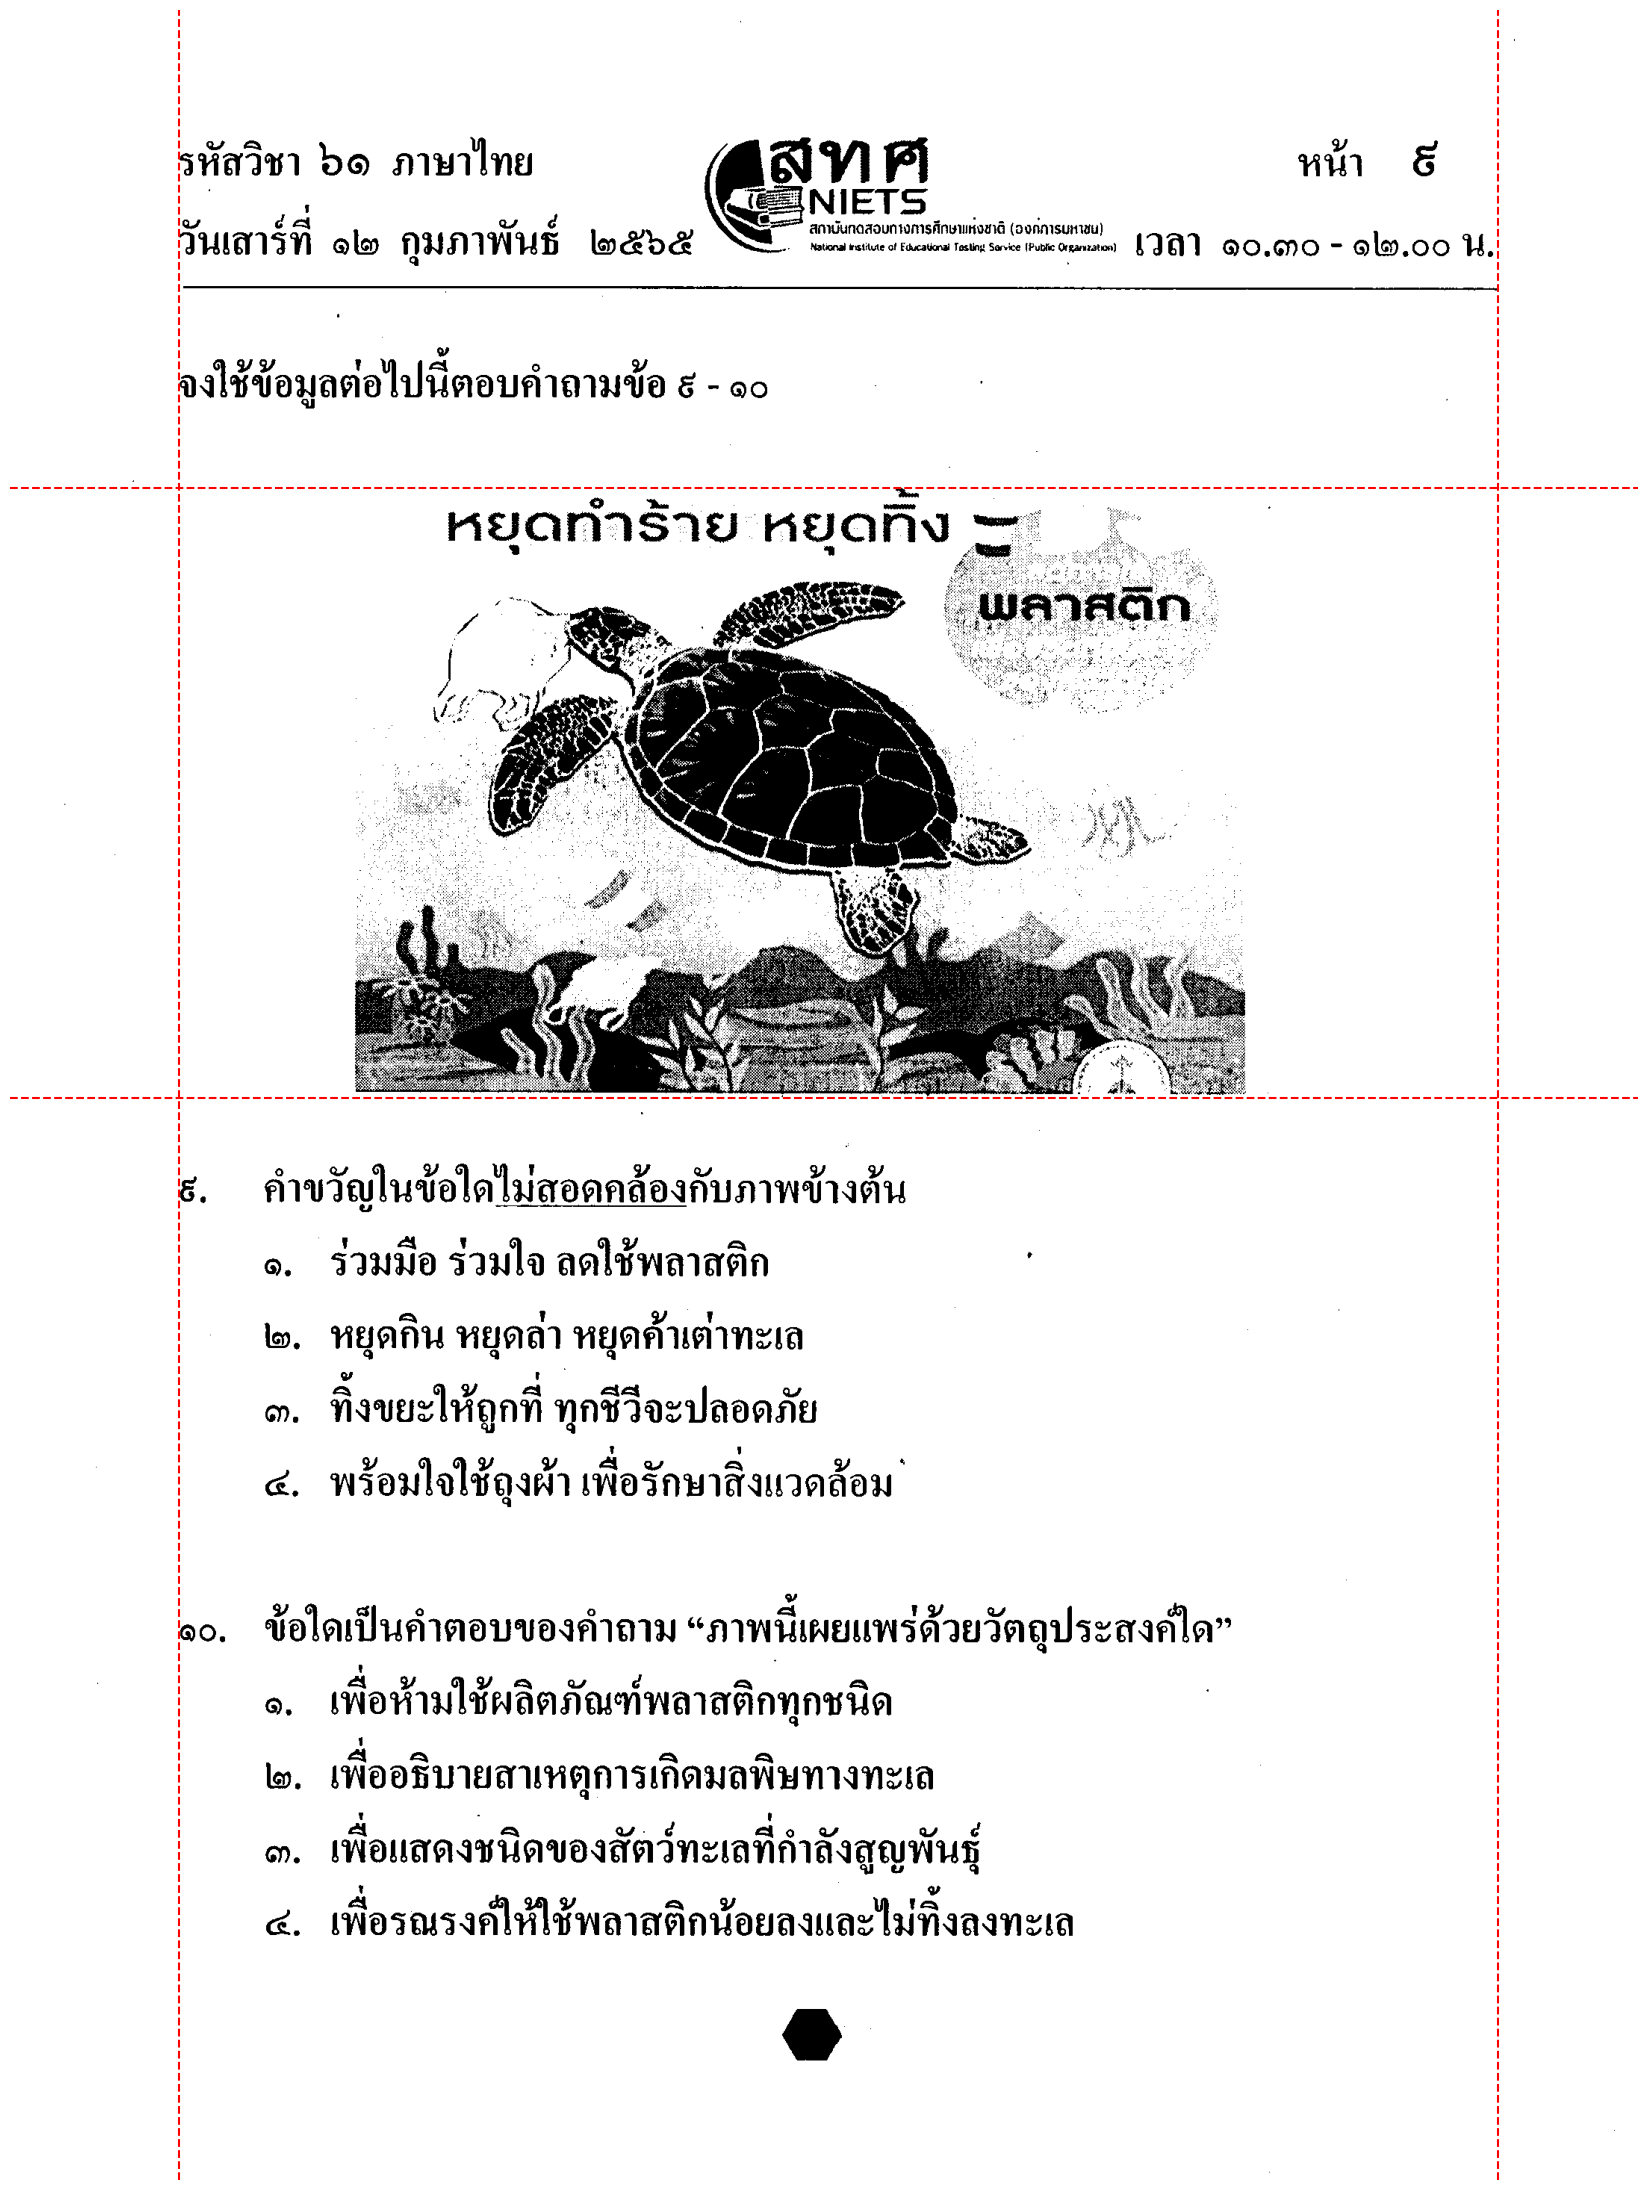

In [9]:
line_rows = []
for row in rows:
    row_length = row['stop'] - row['start']
    if row_length > 0.1 * im_bw.shape[1]:
        line_rows.append(row)

line_cols = []
for col in cols:
    col_length = col['stop'] - col['start']
    # print(col, col_length, 0.1 * im_bw.shape[0], (col_length > 0.1 * im_bw.shape[0]))
    if col_length > 0.1 * im_bw.shape[0]:
        line_cols.append(col)
        
fig, ax = plt.subplots(1, 1, figsize=(21, 29))
ax.imshow(im_bw, cmap='gray')
for row in line_rows:
    ax.axhline(y=row['start'], color='r', linestyle='--')
    ax.axhline(y=row['stop'], color='r', linestyle='--')
    print("draw row: ", row)
    
for col in line_cols:
    ax.axvline(x=col['start'], color='r', linestyle='--')
    ax.axvline(x=col['stop'], color='r', linestyle='--')
    print("draw col: ", col)
    
plt.axis('off')
plt.show()

Line Rows:  [{'start': 640, 'stop': 1457}]
Line Cols:  [{'start': 226, 'stop': 1992}]
Shapes:  [{'start_row': 640, 'stop_row': 1457, 'start_col': 226, 'stop_col': 1992}]


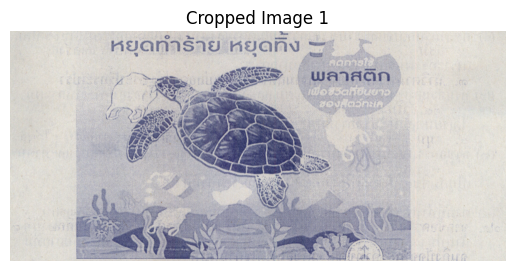

In [10]:
print("Line Rows: ", line_rows)
print("Line Cols: ", line_cols)

shapes = []

if line_rows and line_cols:
    for i in range(len(line_rows)):
        try:
            shapes.append({
                'start_row' : line_rows[i]['start'],
                'stop_row' : line_rows[i]['stop'],
                'start_col' : line_cols[i]['start'],
                'stop_col' : line_cols[i]['stop']
            })
        except:
            break

print("Shapes: ", shapes)

cropped_ims = []

if line_rows and line_cols:
    for i in range(min(len(line_rows), len(line_cols))):
        try:
            start_row, stop_row = line_rows[i]['start'], line_rows[i]['stop']
            start_col, stop_col = line_cols[i]['start'], line_cols[i]['stop']
            
            # Crop the image based on the line regions
            im_rgb = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB)
            cropped_im = im_rgb[start_row:stop_row+1, start_col:stop_col+1]
            cropped_ims.append(cropped_im)
            
            # Plot the cropped image
            plt.subplot(len(line_rows), len(line_cols), i+1)
            plt.imshow(cropped_im, cmap='gray')
            plt.axis('off')
            plt.title(f'Cropped Image {i+1}')
            
        except Exception as e:
            print(f"Error cropping image {i+1}: {e}")
plt.show()